<a href="https://colab.research.google.com/github/tyemalshara/new-canva-feature/blob/main/Canva_Custom_Magic_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# installation

In [ ]:
!pip install ikomia

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.8/146.8 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 117.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Prepare SAM (segment any thing) model

Workflow Untitled run successfully in 6397.823515 ms.


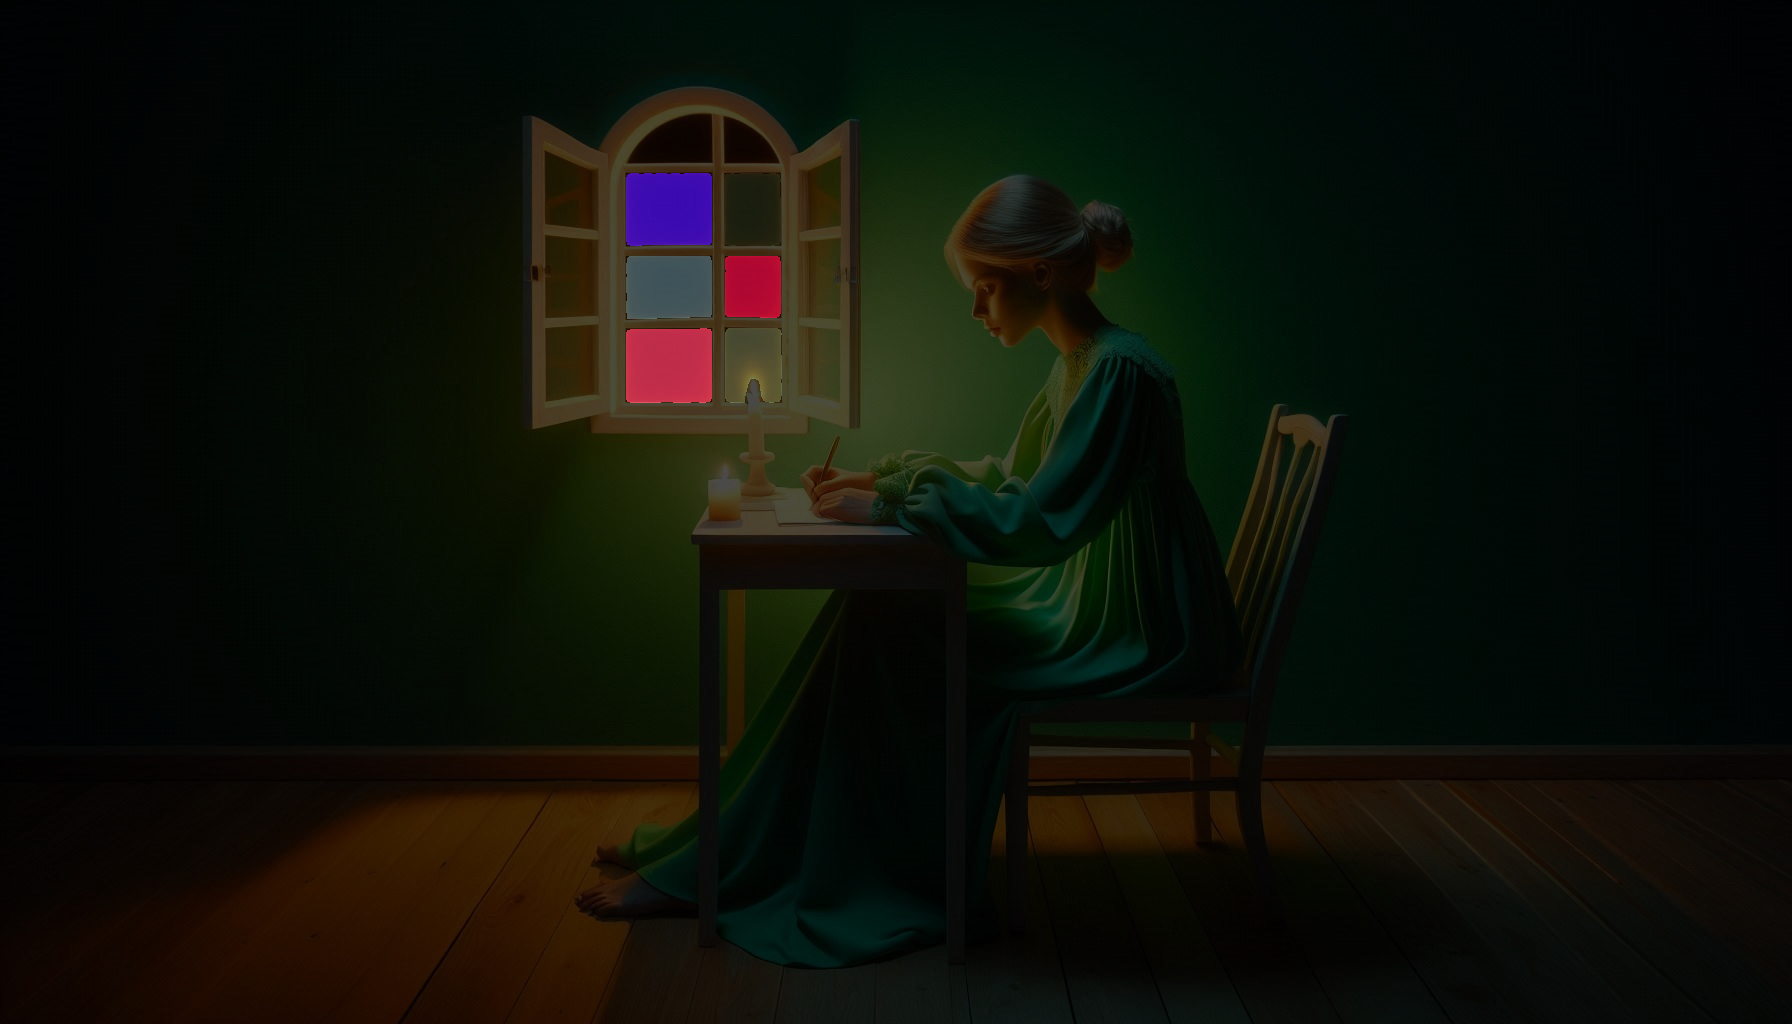

In [ ]:
from ikomia.dataprocess.workflow import Workflow
from ikomia.utils.displayIO import display
from ikomia.utils import ik

# Display segmentation mask
from PIL import ImageShow
ImageShow.register(ImageShow.IPythonViewer(), 0)

# Init your workflow
wf = Workflow()

# Add algorithm
algo  = wf.add_task(name = "infer_segment_anything", auto_connect=True)

algo.set_parameters({
    "model_name": "vit_b",
    "draw_graphic_input": "False",
    # "points_per_side": "16",
    "iou_thres": "0.96",
    "input_size_percent": "100",
    "input_point": "[[670,200], [755,205], [673,281], [751,281], [750,351], [669,363]]",
    "input_box": "[[622,170,716,249], [721,169,787,247], [621,254,716,324], [723,253,786,320], [623,325,716,405], [720,325,788,405]]",
    "mask_id": "1",
    "crop_n_layers": "6",
    "crop_n_points_downscale_factor": "1",
    "crop_nms_thres": "0.7",
    "crop_overlap_ratio": "0.1",
    "min_mask_region_area": "1200",
})

# Run directly on your image
wf.run_on(path="/content/base_image.png")

# Inspect your result
display(algo.get_image_with_mask())


In [ ]:
import numpy as np
from PIL import Image

# save image with mask
what = algo.get_image_with_mask()
# save numpy.ndarray to given path
image = Image.fromarray(what)

# Save the image to the given path
image.save('/content/what.png')

In [ ]:
# Get results as object
results = algo.get_results()

# Get results as JSON
results_json = results.to_json()

In [ ]:
results_json

'{"classes":[],"colors":[{"b":253,"g":11,"r":70},{"b":20,"g":37,"r":20},{"b":127,"g":114,"r":71},{"b":70,"g":3,"r":227},{"b":106,"g":56,"r":247},{"b":69,"g":92,"r":65},{"b":77,"g":65,"r":106},{"b":72,"g":115,"r":117},{"b":246,"g":209,"r":19},{"b":247,"g":95,"r":99},{"b":4,"g":165,"r":121},{"b":41,"g":185,"r":119},{"b":156,"g":2,"r":140},{"b":160,"g":230,"r":12},{"b":216,"g":222,"r":82},{"b":54,"g":33,"r":188},{"b":119,"g":139,"r":2},{"b":234,"g":1,"r":80},{"b":189,"g":21,"r":152},{"b":29,"g":121,"r":143},{"b":194,"g":243,"r":136},{"b":125,"g":107,"r":140},{"b":127,"g":248,"r":182},{"b":103,"g":5,"r":83},{"b":71,"g":87,"r":243},{"b":104,"g":21,"r":204},{"b":243,"g":23,"r":4},{"b":245,"g":103,"r":123},{"b":12,"g":1,"r":103},{"b":133,"g":145,"r":37},{"b":121,"g":26,"r":67},{"b":229,"g":167,"r":6},{"b":222,"g":94,"r":132},{"b":227,"g":177,"r":5},{"b":60,"g":166,"r":108},{"b":81,"g":116,"r":179},{"b":105,"g":120,"r":28},{"b":209,"g":244,"r":17},{"b":211,"g":92,"r":7},{"b":102,"g":130,"r":19

In [ ]:
import json

mask_polygons = json.loads(results_json)
x_list = list()
y_list = list()
# the result is a Python dictionary:
print(mask_polygons["polygons"][0]["inners"][0])
print("==============================================")
for j in mask_polygons["polygons"][0]["inners"]:
  for i in j:
    x_list.append(i["x"])
    y_list.append(i["y"])
max_value_x = max(x_list)
min_value_x = min(x_list)
max_value_y = max(y_list)
min_value_y = min(y_list)
print(x_list)
print(y_list)
print(max_value_x)
print(min_value_x)
print(max_value_y)
print(min_value_y)

width = max_value_x - min_value_x
height = max_value_y - min_value_y
print(width)
print(height)


[{'x': 728, 'y': 327}, {'x': 777, 'y': 327}, {'x': 779, 'y': 328}, {'x': 781, 'y': 330}, {'x': 781, 'y': 332}, {'x': 781, 'y': 335}, {'x': 781, 'y': 354}, {'x': 782, 'y': 378}, {'x': 781, 'y': 379}, {'x': 781, 'y': 382}, {'x': 782, 'y': 395}, {'x': 781, 'y': 399}, {'x': 780, 'y': 401}, {'x': 773, 'y': 403}, {'x': 769, 'y': 403}, {'x': 765, 'y': 402}, {'x': 760, 'y': 396}, {'x': 759, 'y': 390}, {'x': 759, 'y': 384}, {'x': 757, 'y': 380}, {'x': 755, 'y': 379}, {'x': 750, 'y': 380}, {'x': 748, 'y': 384}, {'x': 747, 'y': 388}, {'x': 746, 'y': 392}, {'x': 745, 'y': 396}, {'x': 744, 'y': 403}, {'x': 730, 'y': 403}, {'x': 727, 'y': 402}, {'x': 725, 'y': 400}, {'x': 724, 'y': 398}, {'x': 724, 'y': 332}, {'x': 725, 'y': 330}, {'x': 728, 'y': 327}]
[728, 777, 779, 781, 781, 781, 781, 782, 781, 781, 782, 781, 780, 773, 769, 765, 760, 759, 759, 757, 755, 750, 748, 747, 746, 745, 744, 730, 727, 725, 724, 724, 725, 728, 700, 706, 711, 712, 712, 711, 709, 705, 699, 691, 673, 672, 661, 630, 626, 625, 

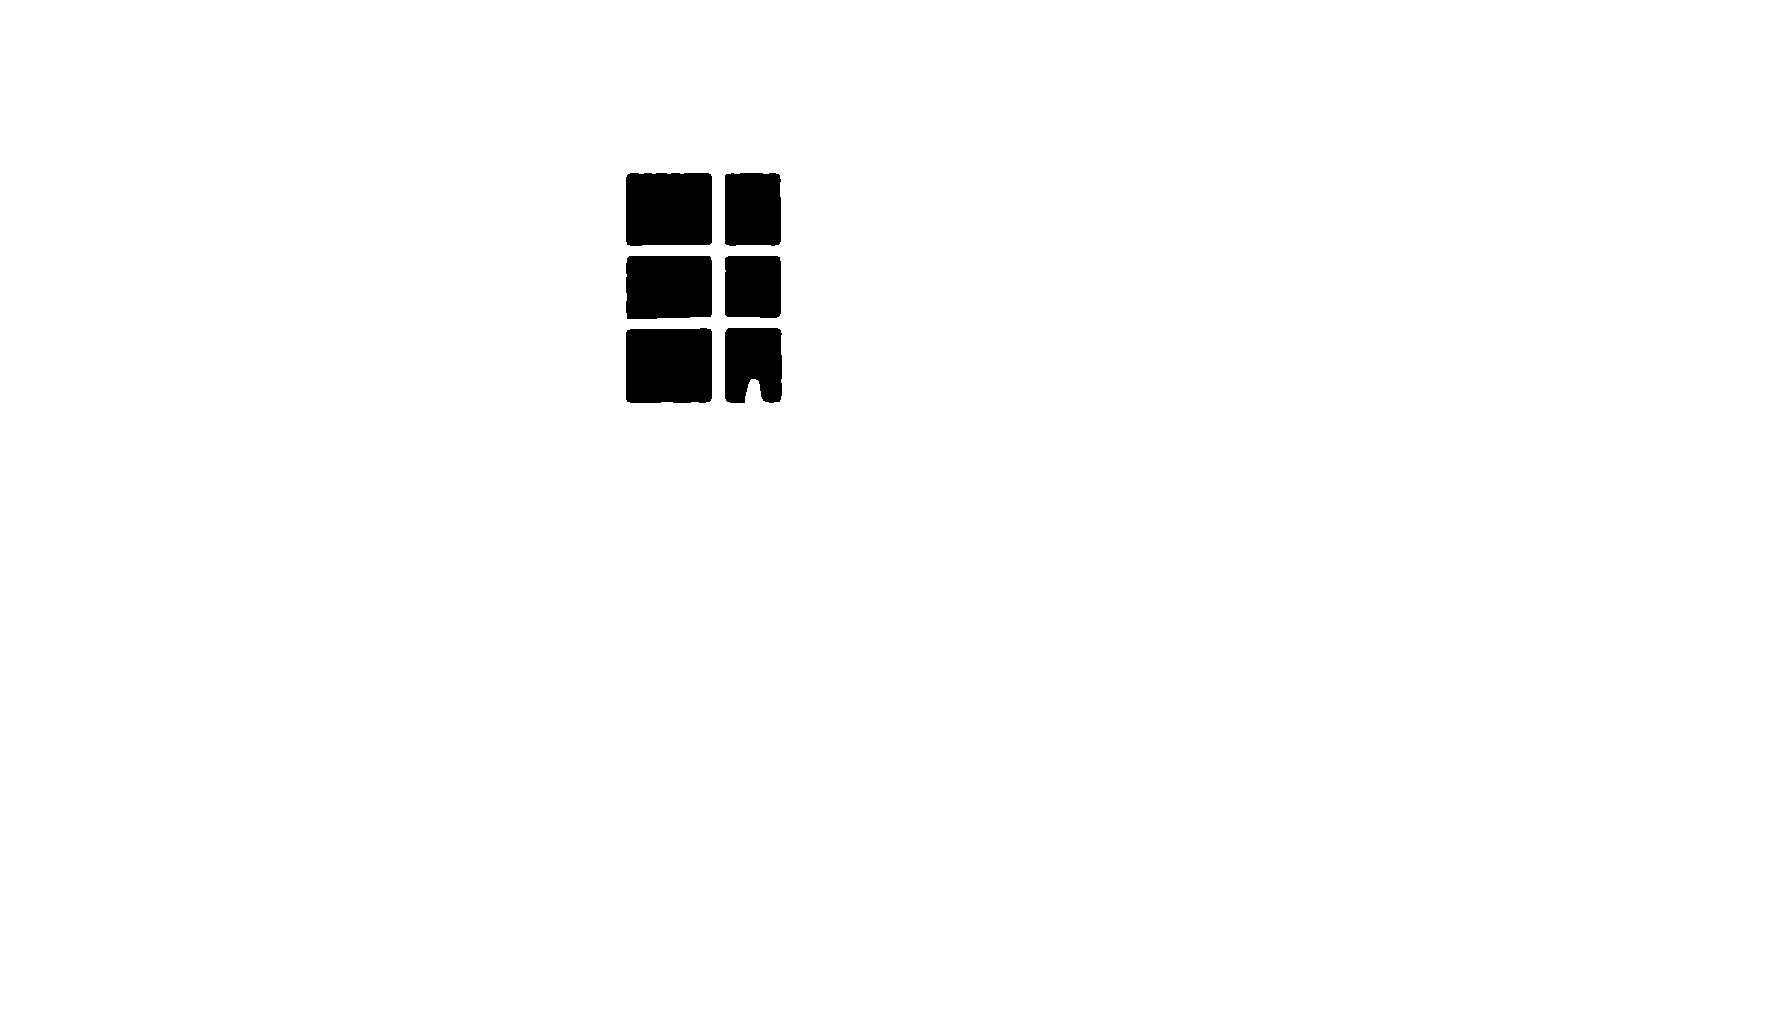

In [ ]:
# Get the mask and associated class names
mask = results.get_mask()
mask_from_class = (mask == 0)
display(mask_from_class)

# Process masked image

# Prepare text-to-image generation model

In [ ]:
from ikomia.dataprocess.workflow import Workflow
from ikomia.utils.displayIO import display
# Display segmentation mask
from PIL import ImageShow
ImageShow.register(ImageShow.IPythonViewer(), 0)

# Init your workflow
wf = Workflow()

# Add algorithm
algo = wf.add_task(name = "infer_hf_stable_diffusion", auto_connect=False)

algo.set_parameters({
    'model_name': 'stabilityai/stable-diffusion-xl-base-1.0',
    'prompt': 'Night City view only showing sky and city lights',
    'guidance_scale': '7.5',
    'negative_prompt': 'low resolution',
    'num_inference_steps': '50',
    'width': '512',
    'height': '512',
    'seed': '1981651',
    'use_refiner': 'False'
})

# Run
wf.run()

# Display the image
display(algo.get_output(0).get_image())


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

RuntimeError: <class 'torch.cuda.OutOfMemoryError'>: CUDA out of memory. Tried to allocate 64.00 MiB (GPU 0; 14.75 GiB total capacity; 13.29 GiB already allocated; 63.06 MiB free; 13.68 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF:   File "/root/Ikomia/Plugins/Python/infer_hf_stable_diffusion/infer_hf_stable_diffusion_process.py", line 203, in run
    result = self.pipe(

  File "/usr/local/lib/python3.10/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion_xl/pipeline_stable_diffusion_xl.py", line 1279, in __call__
    image = self.vae.decode(latents, return_dict=False)[0]

  File "/usr/local/lib/python3.10/dist-packages/diffusers/utils/accelerate_utils.py", line 46, in wrapper
    return method(self, *args, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/diffusers/models/autoencoders/autoencoder_kl.py", line 321, in decode
    decoded = self._decode(z).sample

  File "/usr/local/lib/python3.10/dist-packages/diffusers/models/autoencoders/autoencoder_kl.py", line 292, in _decode
    dec = self.decoder(z)

  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/diffusers/models/autoencoders/vae.py", line 332, in forward
    sample = self.mid_block(sample, latent_embeds)

  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/diffusers/models/unets/unet_2d_blocks.py", line 738, in forward
    hidden_states = attn(hidden_states, temb=temb)

  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/diffusers/models/attention_processor.py", line 490, in forward
    return self.processor(

  File "/usr/local/lib/python3.10/dist-packages/diffusers/models/attention_processor.py", line 767, in __call__
    attention_probs = attn.get_attention_scores(query, key, attention_mask)

  File "/usr/local/lib/python3.10/dist-packages/diffusers/models/attention_processor.py", line 562, in get_attention_scores
    baddbmm_input = torch.empty(
 (Code 18)

In [ ]:
import numpy as np
from PIL import Image

diffusion_image = algo.get_output(0).get_image()
diffusion_image = Image.fromarray(diffusion_image)
diffusion_image_path = '/content/diffusion_image.png'

# Save the image to the given path
diffusion_image.save('/content/diffusion_image.png')

In [ ]:
# Algo ouputs
# Iterate over outputs
for output in algo.get_outputs():
    # Print information
    print(output)
    # Export it to JSON
    output.to_json()

# Functions for post proccessing image

*   iterate through the masks and find out the mask with theminimum x and y values and store it in a variable
*   in the iteration of the masks find out the maximum x and y values and store it in a different variable
*   then iterate through both variables and find out the minimum and maximum x and y values respectively
*   calculate the width and height of the rectangle using the minimum and maximum x and y values
*   pass the width and height to the text-to-image algorithm's parameters

In [ ]:
import cv2
import numpy as np

def place_diffusion_image_white_canvas(diffusion_image_path, base_image_path, min_value_x, min_value_y):
  '''To place the ouput diffusion image at specific coordinates within an empty image of a given height and width with a white background.
  Args:
    diffusion_image_path: path to output diffusion image
    base_image_path: path to base image
    min_value_x: minimum value of x
    min_value_y: minimum value of y
  Returns:
    diffusion_image_white_canvas: deffuion output image placed on the right coordinates masked sam mask on a white background
  '''
  # Define the dimensions of the base image
  src2 = cv2.imread(base_image_path)
  # get base_width and base_height from src2
  base_height = src2.shape[0]
  base_width = src2.shape[1]
  # hard coded base_width and base_height
  # base_width = 1792
  # base_height = 1024

  # Create a white background image
  base_image = np.ones((base_height, base_width, 3), dtype=np.uint8) * 255

  # Load the diffusion output image you want to place
  image_to_place = cv2.imread(diffusion_image_path)

  # Define the coordinates where you want to place the image
  # x = 625 # min_value_x
  # y = 172 # min_value_y
  x = min_value_x
  y = min_value_y

  fit_size_height = base_height - y
  if image_to_place.shape[0] > fit_size_height:
    image_to_place = image_to_place[0:fit_size_height, :]
  fit_size_width = base_width - x
  if image_to_place.shape[1] > fit_size_width:
    image_to_place = image_to_place[:, 0:fit_size_width]

  # Get the dimensions of the image to place
  img_height, img_width = image_to_place.shape[:2]

  # make sure the image is not bigger than the base image
  if img_height > base_height:
    # crop the image to fit the base image height
    image_to_place = image_to_place[y:base_height, :]
    img_height = base_height
  if img_width > base_width:
    # crop the image to fit the base image width
    image_to_place = image_to_place[:, x:base_width]
    img_width = base_width

  cv2.imwrite('diffusion_image_white_canvas_cropped_to_fit_size.jpg', image_to_place)

  # Place the image on the base image at the specified coordinates
  base_image[y:y+img_height, x:x+img_width] = image_to_place
  diffusion_image_white_canvas = base_image
  # Save the result
  cv2.imwrite('diffusion_image_white_canvas.jpg', diffusion_image_white_canvas)

  return diffusion_image_white_canvas


In [ ]:
def fill_polygon(diffusion_image_white_canvas, base_image_path, polygon_points):
  src1 = diffusion_image_white_canvas
  src2 = cv2.imread(base_image_path)

  mask = np.zeros(src1.shape[:2], dtype=np.uint8)
  cv2.fillPoly(mask, [polygon_points], 255)
  src1_polygon = cv2.bitwise_and(src1, src1, mask=mask)
  mask_inv = cv2.bitwise_not(mask)
  src2_bg = cv2.bitwise_and(src2, src2, mask=mask_inv)
  filled_polygon_image = cv2.add(src2_bg, src1_polygon)
  cv2.imwrite('filled_polygon_image.jpg', filled_polygon_image)
  filled_polygon_image_path = 'filled_polygon_image.jpg'
  return filled_polygon_image, filled_polygon_image_path



# Post-Process image

In [ ]:
# overlay the output image from the text-to-image algorithm on masked area of the input image


In [ ]:
base_image_path = '/content/base_image.png'
# diffusion_image_path = '/content/longscreenshot.jpg'
counter = 0
diffusion_image_white_canvas = place_diffusion_image_white_canvas(diffusion_image_path, base_image_path, min_value_x, min_value_y)
# polygon_points = mask_polygons["polygons"][0]["inners"]
for polygon_points in mask_polygons["polygons"][0]["inners"]:
  # convert the list of dictionaries into a NumPy array
  polygon_points = np.array([[point["x"], point["y"]] for point in polygon_points])
  if counter == 0:
    filled_polygon_image, filled_polygon_image_path = fill_polygon(diffusion_image_white_canvas, base_image_path, polygon_points)
    counter += 1
  else:
    filled_polygon_image, filled_polygon_image_path = fill_polygon(diffusion_image_white_canvas, filled_polygon_image_path, polygon_points)
  cv2.imwrite('filled_polygon_image.jpg', filled_polygon_image)

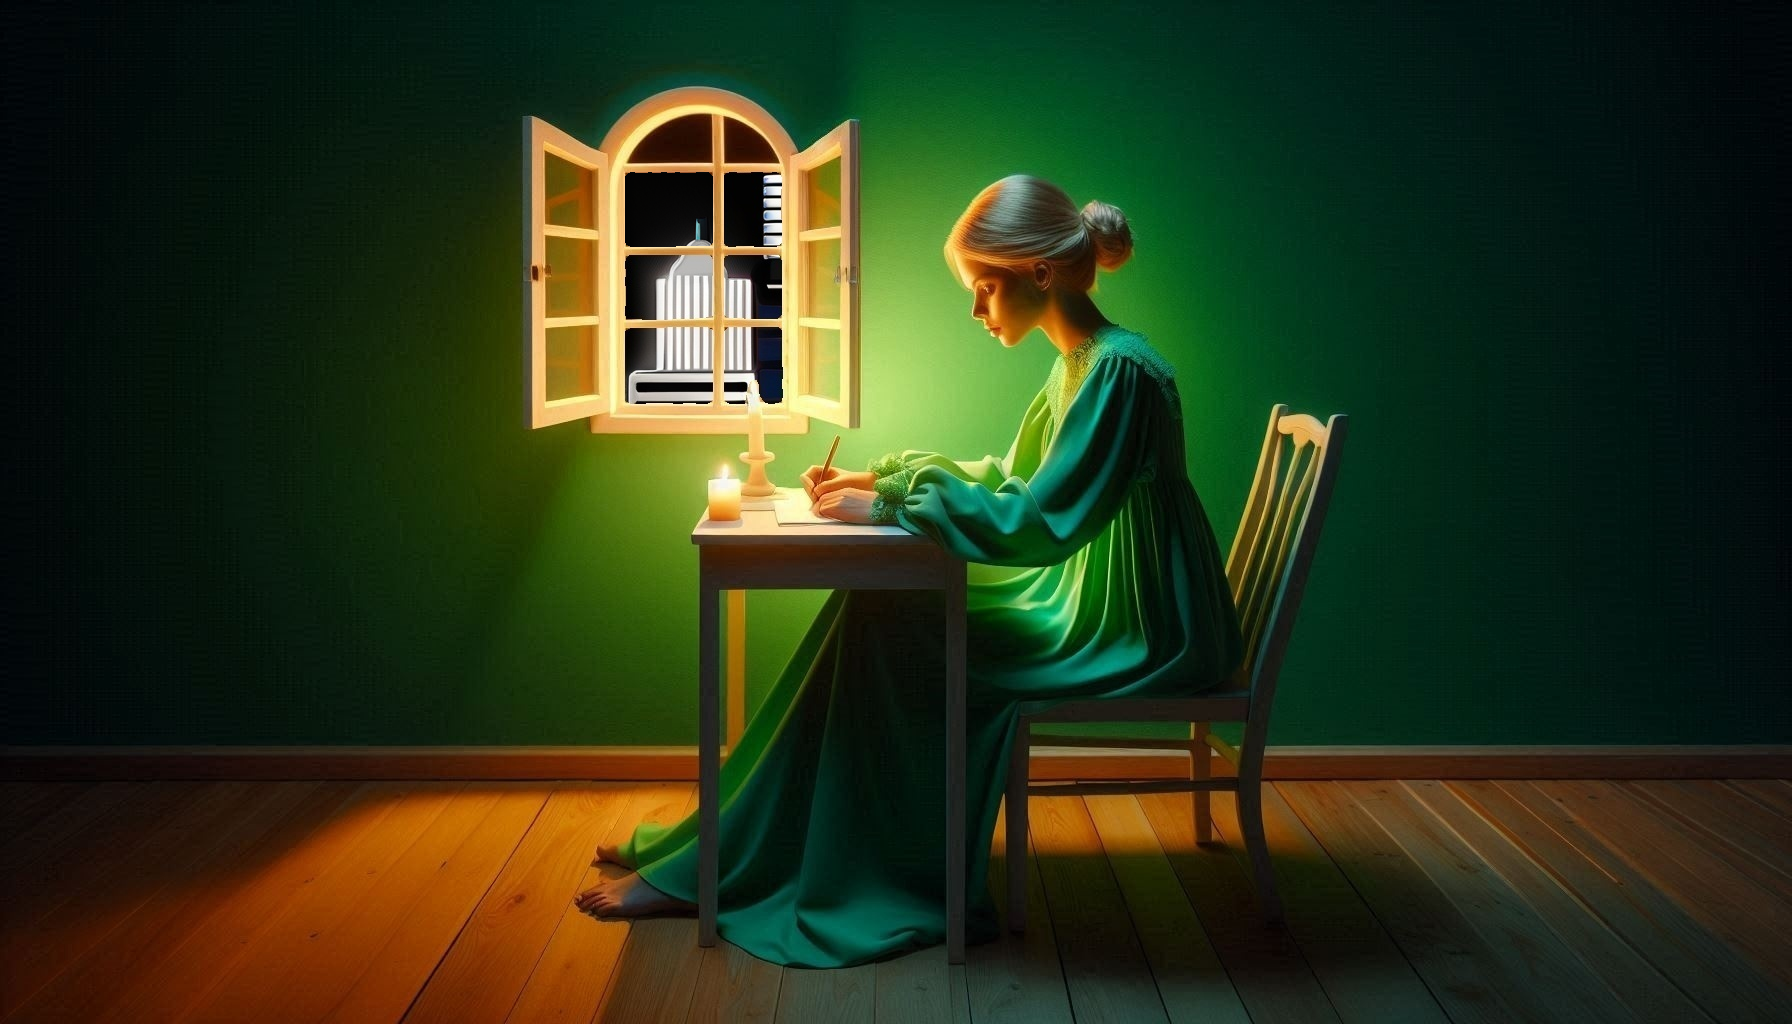

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(filled_polygon_image)

# Testing

In [ ]:
from PIL import Image
import numpy as np

# Load the base image and the overlay image
base_image = Image.open('/content/base_image.png')
overlay_image = Image.open('/content/image_sam_masked.png')

# Create a boolean mask (example)
mask = np.array([[True, False, True], [False, False, True], [True, True, False]])


In [ ]:
overlay_image = overlay_image.resize(base_image.size)


In [ ]:
base_array = np.array(base_image)
overlay_array = np.array(overlay_image)


In [ ]:
# Ensure the mask is the same size as the images
mask = np.resize(mask, base_array.shape[:2])

# Create a new image array to hold the result
result_array = base_array.copy()

mask_3d = np.stack([mask]*3, axis=-1)
mask_2d = np.stack([mask]*2, axis=-1)
result_array_2d = np.stack([result_array]*2, axis=-1)
# Apply the overlay where the mask is False
result_array[~mask_2d] = overlay_array[~mask]

# Convert the result array back to an image
result_image = Image.fromarray(result_array)


IndexError: boolean index did not match indexed array along dimension 2; dimension is 3 but corresponding boolean dimension is 2

In [ ]:
result_image.save('result_image.png')
result_image.show()


In [ ]:
image = Image.fromarray(mask)

# Save the image to the given path
image.save('/content/what.png')

In [ ]:
from PIL import Image
import numpy as np

# Load the base image and the overlay image
base_image = Image.open('/content/_d5c905eb-4c72-4df9-aa53-076231fbeef3.png')
overlay_image = Image.open('/content/image_sam_masked.png')

# Create a boolean mask (example)
mask = np.array([[True, False, True], [False, False, True], [True, True, False]])

# Resize the overlay image to match the base image
overlay_image = overlay_image.resize(base_image.size)

# Convert the images to numpy arrays
base_array = np.array(base_image)
overlay_array = np.array(overlay_image)

# Ensure the mask is the same size as the images
mask = np.resize(mask, base_array.shape[:2])

# Convert the mask to a 3-channel mask to match the image dimensions
mask_3d = np.repeat(mask[:, :, np.newaxis], 3, axis=2)

# Create a new image array to hold the result
result_array = base_array.copy()

# Apply the overlay where the mask is False
result_array[~mask_3d] = overlay_array[~mask_3d]

# Convert the result array back to an image
result_image = Image.fromarray(result_array)

# Save or display the result
result_image.save('result_image.png')
result_image.show()



IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

# To place the ouput diffusion image at specific coordinates within an empty image of a given height and width with a white background.

In [ ]:
import cv2
import numpy as np

# Define the dimensions of the base image
src2 = cv2.imread('/content/_d5c905eb-4c72-4df9-aa53-076231fbeef3.png')
# get base_width and base_height from src2
height = src2.shape[0]
width = src2.shape[1]
# hard coded base_width and base_height
base_width = 1792
base_height = 1024

# Create a white background image
base_image = np.ones((base_height, base_width, 3), dtype=np.uint8) * 255

# Load the image you want to place
image_to_place = cv2.imread('/content/image_sam_masked_cropped.png')  # should be the output diffusion image

# Define the coordinates where you want to place the image
x = 625 # min_value_x
y = 172 # min_value_y

# Get the dimensions of the image to place
img_height, img_width = image_to_place.shape[:2]

# Place the image on the base image at the specified coordinates
base_image[y:y+img_height, x:x+img_width] = image_to_place
diffusion_image_white_canvas = base_image
# Save the result
cv2.imwrite('diffusion_image_white_canvas.jpg', diffusion_image_white_canvas)


True

# test 2

In [ ]:
import cv2
import numpy as np

# src1 = cv2.imread('/content/image_sam_masked.png')
# src1 = cv2.imread('/content/image_sam_masked_cropped_placed.png')
src1 = diffusion_image_white_canvas
src2 = cv2.imread('/content/_d5c905eb-4c72-4df9-aa53-076231fbeef3.png')


In [ ]:
# hard coded polygon points
polygon_points = np.array([[728, 327], [782, 378], [780, 401], [759, 384], [746, 392], [724, 398], [728, 327]], np.int32)
# polygon_points = [{"x":728,"y":327},{"x":777,"y":327},{"x":779,"y":328},{"x":781,"y":330},{"x":781,"y":332},{"x":781,"y":335},{"x":781,"y":354},{"x":782,"y":378},{"x":781,"y":379},{"x":781,"y":382},{"x":782,"y":395},{"x":781,"y":399},{"x":780,"y":401},{"x":773,"y":403},{"x":769,"y":403},{"x":765,"y":402},{"x":760,"y":396},{"x":759,"y":390},{"x":759,"y":384},{"x":757,"y":380},{"x":755,"y":379},{"x":750,"y":380},{"x":748,"y":384},{"x":747,"y":388},{"x":746,"y":392},{"x":745,"y":396},{"x":744,"y":403},{"x":730,"y":403},{"x":727,"y":402},{"x":725,"y":400},{"x":724,"y":398},{"x":724,"y":332},{"x":725,"y":330},{"x":728,"y":327}]
# polygon_points = mask_polygons["polygons"][0]["inners"]
# # convert the list of dictionaries into a NumPy array
# array = np.array([[point["x"], point["y"]] for point in polygon_points])


In [ ]:
mask = np.zeros(src1.shape[:2], dtype=np.uint8)
cv2.fillPoly(mask, [polygon_points], 255)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
src1_polygon = cv2.bitwise_and(src1, src1, mask=mask)


In [ ]:
mask_inv = cv2.bitwise_not(mask)
src2_bg = cv2.bitwise_and(src2, src2, mask=mask_inv)


In [ ]:
result = cv2.add(src2_bg, src1_polygon)


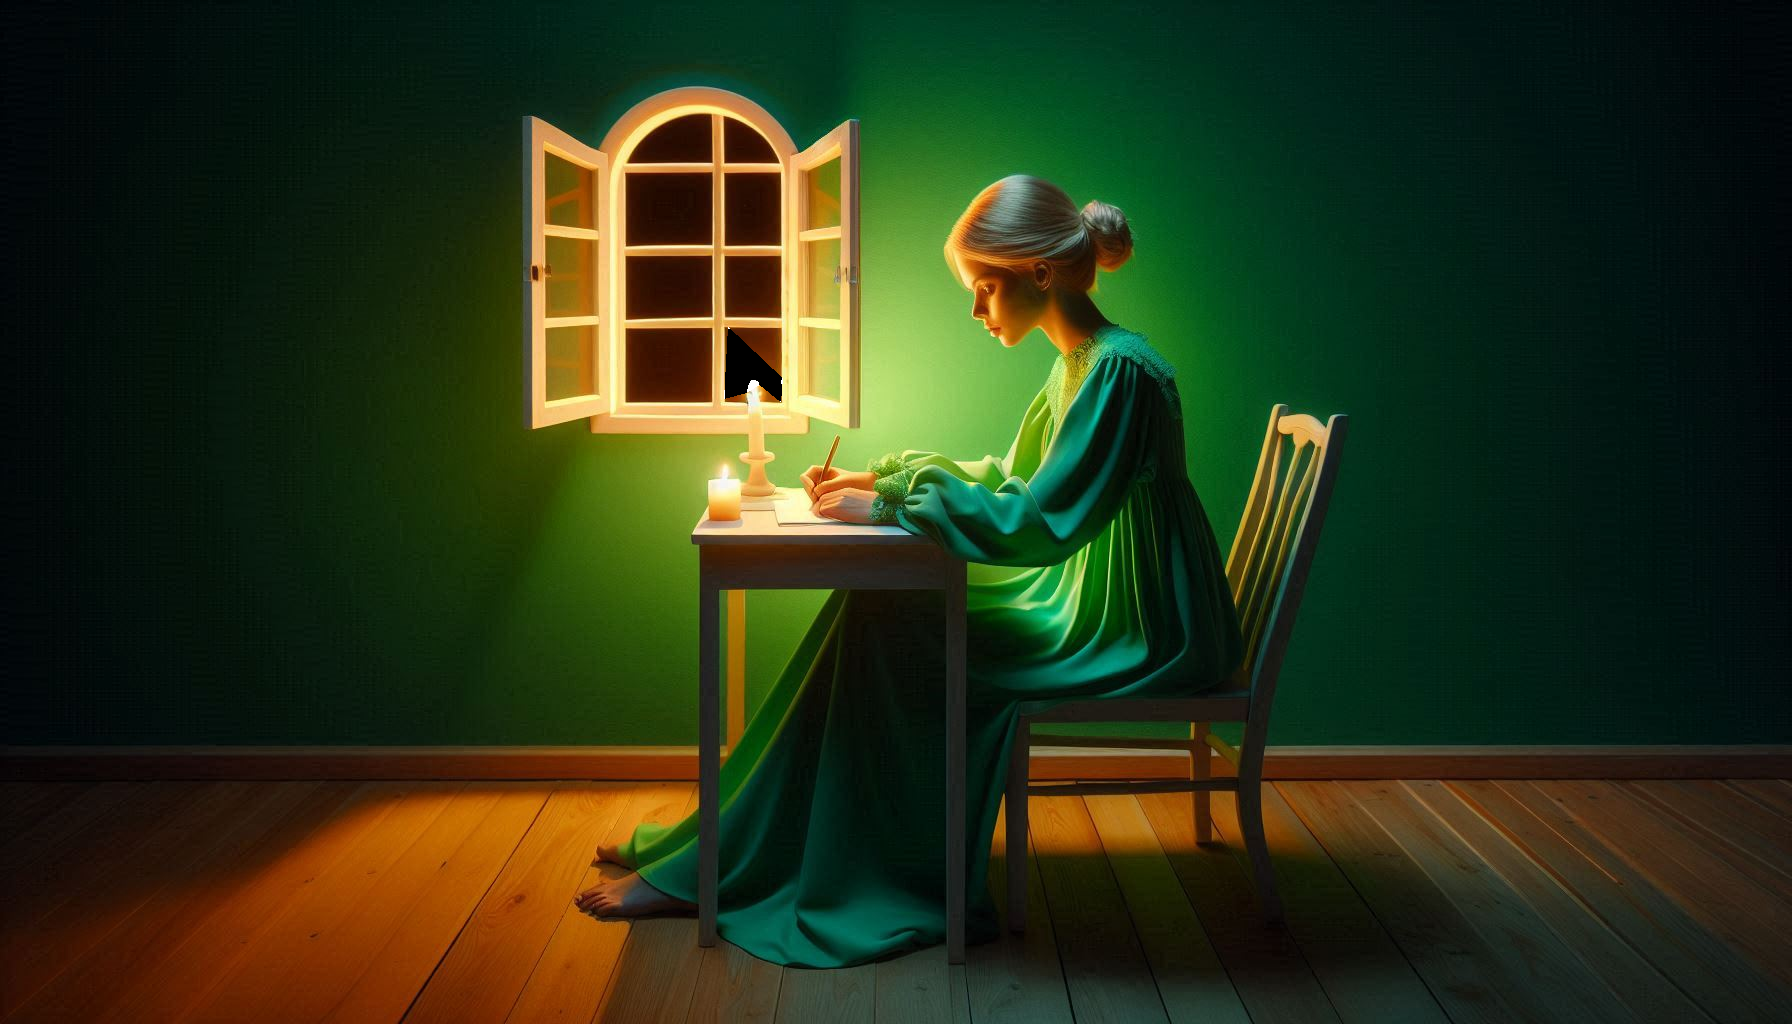

In [ ]:
from google.colab.patches import cv2_imshow

cv2.imwrite('result_image.jpg', result)
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()


# prompt: create a TODO note in markup for reminding me to make the polygon line thinner

# TODO: Make the polygon line thinner when drawing it on the image.
